# Roteiro Dirigido - Semana 3 - Michel B Fiorio

In [1]:
## NumPy para manipular matrizes e vetores
import numpy as np

## Pandas para manipular os dataframes
import pandas as pd

## Plotar figuras bonitas
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)
import seaborn as sns

1. Como relacionar as redes neurais artificiais com as células neurais?


**Resposta**: As principais células do cérebro de animais e humanos são conhecidas como neurônios. Tais células são interconectas entre si e possuem capacidade de gerar sinais elétricos e transmitir estes sinais entre suas conexões para outros neurônios. É baseado no funcionamento do cérebro e sua gigantesca rede de neurônios que foi criada a rede neural artificial. O propósito de imitar o funcionamento do cérebro é permitir às RNAs resolverem problemas complexos, assim como o cérebro humano consegue fazer. Portanto, após o ajuste dos parâmetros matemáticos de uma RNA através do processo de treinamento dessa rede, ela se torna capaz de apresentar um resultado (uma classificação ou predição) baseado nos dados que são apresentados às suas entradas.

2. Quais são as funções de ativação mais utilizadas nas redes neurais artificiais. Desenhe os gráficos de cada uma.


**Resposta**: Funções de ativação mais utilizadas são a sigmoide e a tangente hiperbólica. 

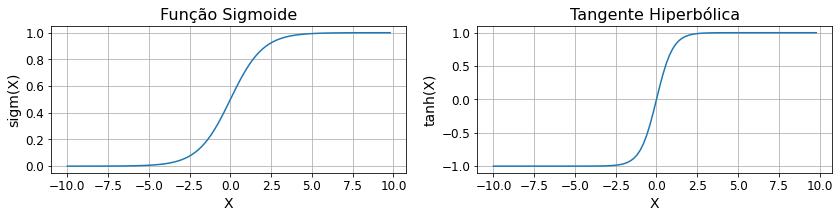

In [ ]:
# Desenhando a função sigmoide e função tangencial hiperbólica

# Criando array x e calculando sigmoide e tang hiperbólica para os dados de x
x = np.arange(-10, 10, 0.2)
sigm = 1 / (1+np.exp(-x))
tangh = np.tanh(x)

# Desenhando os gráficos das funções
plt.figure(figsize=(14,2.7))

# Sigmoide
plt.subplot(121)
plt.plot(x,sigm)
plt.xlabel('X')
plt.ylabel('sigm(X)')
plt.title('Função Sigmoide', fontsize=16)
plt.grid()

# Hiperbólica
plt.subplot(122)
plt.plot(x,tangh)
plt.xlabel('X')
plt.ylabel('tanh(X)')
plt.title('Tangente Hiperbólica', fontsize=16)
plt.grid()

3. Suponha uma rede PMC composta por uma camada de entrada com 10 neurônios, conectada com uma camada escondida com 50 neurônios artificiais e uma camada de saída com 3 neurônios artificiais. Todos os neurônios utilizam a função de ativação ReLU.
**Respostas:**
  1. Qual é o formato da matriz de entrada X?
      
      *Resposta*: X = [x1, x2, ... , x10]
  
  2. Quais são os formatos das matrizes de pesos (Wh) e da matriz de limiares de ativação (bh) da camada escondida?

    *Resposta*: Wh = W1(i,j)    e   bh = b1(j)       ,onde W1 representa os pesos da camada oculta #1, b1 representa os limiares de ativação da camada oculta #1, i=1,2,...,10 representa o número da entrada da PMC e j=1,2,...,50 representa o número do neurônio na camada escondida.

  3. Quais são os formatos das matrizes de pesos (Wo) e da matriz de limiares de ativação (bo) da camada de saída?

    *Resposta*: Wo = W2(j,m)    e   bo = b2(m)        , onde W2 representa os pesos da camada de saída, b2 representa os limiares de ativação da camada de saída, j=1,2,...,50 representa o número do neurônio na camada escondida e m=1,2,3 representa o número do neurônio de saída.

  4. Qual o formato da matriz de saída Y da rede PMC?

    *Resposta*: Y = y(m), onde m=1,2,3 representa o número do neurônio de saída.

  5. Escreva a equação que computa a saída Y da rede PMC em função de X, Wh, bh, Wo, e bo.

    *Resposta*: Y = G(G(X*Wh + bh)*Wo + bo)           , onde G representa a função de ativação dos neurônios que no nosso caso foi definida a função ReLU.

4. Quantos neurônios na camada de saída são necessários para uma rede PMC classificar um e-mail em "Spam" ou "Não-spam"? Qual função de ativação deve ser utilizada na camada de saída desta rede PMC?

**Resposta**: o problema se enquadra em uma classificação binária simples e portanto é necessário apenas um neurônio na camada de saída. A função de ativação a ser utilizada será a 'sigmoid'.

5. Se você quiser construir uma rede neural artificial que identifique números escritos a mão, de 0 a 10, quantos neurônios seriam necessários na camada de saída da rede? Qual função de ativação deve ser utilizada? Por quê?


**Resposta**: esse problema se enquadra em uma classificação multiclasse. Portanto o número de neurônios na camada de saída deve ser igual ao número de classes distintas, sendo 11 neurônios. A função de ativação a ser utilizada nesse modelo é a softmax. Essa função determina a probabilidade das diferentes saídas e essas probabilidades somam 100%. É a função ideal para um problema de classificação multiclasse pois evita que o modelo gere uma dupla classificação para um mesmo objeto.

6. Utilize o notebook disponibilizado para o problema de classificação multiclasse e, ajustando diferentes hiperparâmetros de treinamento, tente atingir 98% de precisão nas inferências. Apresente o gráfico de treinamento e validação da função de loss. Caso não consiga atingir este nível de precisão, mostre qual foi seu melhor resultado.

**Resposta**:

In [ ]:
import tensorflow as tf
from tensorflow import keras

In [ ]:
# Carregando banco de dados e separando os dados em treinamento e teste

fashion_mnist = keras.datasets.fashion_mnist

(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data()

X_train_full.shape

(60000, 28, 28)

In [ ]:
X_test.shape

(10000, 28, 28)

In [ ]:
# Separando o banco de dados em treinamento e validação

X_valid, X_train = X_train_full[:5000] / 255., X_train_full[5000:] / 255. #o ponto em 255. caracteriza a conversao para float
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]
X_test = X_test / 255.

In [ ]:
X_train.shape

(55000, 28, 28)

In [ ]:
# Criando o modelo de PMC com 3 camadas ocultas de 200 neurônios cada
## Declaracao do modelo sequencial para o Keras
model = keras.models.Sequential() 
## Camada de entrada (flatten transforma a imagem 28x28 em um vetor 1D de 784 valores)
model.add(keras.layers.Flatten(input_shape=[28, 28])) 
## Primeira camada escondida, com 300 neuronios e funcao de ativacao ReLU; 
### Cada camada 'Dense' gerencia seus proprios parametros, incluindo bias
model.add(keras.layers.Dense(200, activation="relu")) 
## Segunda camada escondida, com 100 neuronios e ReLU
model.add(keras.layers.Dense(200, activation="relu"))
## Segunda camada escondida, com 100 neuronios e ReLU
model.add(keras.layers.Dense(200, activation="relu"))
## Camada de saida com 10 neuronios e funcao de ativacao softmax (multiclasse)
model.add(keras.layers.Dense(10, activation="softmax")) 

In [ ]:
# Compilando o modelo
model.compile(loss='sparse_categorical_crossentropy', 
              optimizer='sgd', 
              metrics=['accuracy'])

In [ ]:
# Treinando o modelo
history = model.fit(X_train,y_train, epochs=60,
                    validation_data=[X_valid,y_valid],
                    callbacks=[keras.callbacks.EarlyStopping(patience=10)]
                    )

Epoch 1/60
1719/1719 [==============================] - 8s 4ms/step - loss: 0.7513 - accuracy: 0.7485 - val_loss: 0.4902 - val_accuracy: 0.8310
Epoch 2/60
1719/1719 [==============================] - 7s 4ms/step - loss: 0.4865 - accuracy: 0.8278 - val_loss: 0.4428 - val_accuracy: 0.8452
Epoch 3/60
1719/1719 [==============================] - 8s 5ms/step - loss: 0.4363 - accuracy: 0.8461 - val_loss: 0.4013 - val_accuracy: 0.8608
Epoch 4/60
1719/1719 [==============================] - 8s 5ms/step - loss: 0.4072 - accuracy: 0.8553 - val_loss: 0.3923 - val_accuracy: 0.8660
Epoch 5/60
1719/1719 [==============================] - 8s 5ms/step - loss: 0.3839 - accuracy: 0.8635 - val_loss: 0.3709 - val_accuracy: 0.8694
Epoch 6/60
1719/1719 [==============================] - 7s 4ms/step - loss: 0.3673 - accuracy: 0.8682 - val_loss: 0.3611 - val_accuracy: 0.8722
Epoch 7/60
1719/1719 [==============================] - 7s 4ms/step - loss: 0.3520 - accuracy: 0.8746 - val_loss: 0.3639 - val_accuracy:

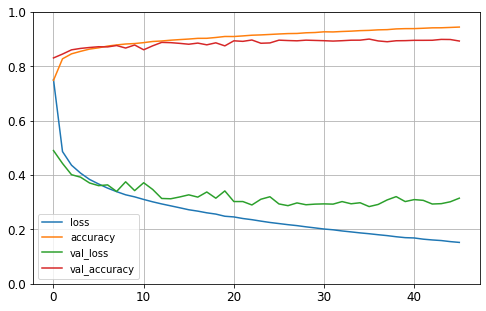

In [ ]:
# Gráfico de treinamento e validação
import pandas as pd
import matplotlib.pyplot as plt

pd.DataFrame(history.history).plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(0,1) # ajusta o eixo y para os limites de 0 a 1
plt.show()

In [ ]:
import numpy as np
from scipy.stats import reciprocal
from sklearn.model_selection import RandomizedSearchCV # implementa a k-fold cross-validation



In [ ]:
# Definindo função para criação de modelo de PCM genérica. Adicionado momentum de 0.95 no otimizador SGD.
# Duas camadas ocultas de 200 neurônios cada
def build_model(n_hidden=2, n_neurons=200, learning_rate=3e-2, input_shape=[28, 28]):
  model = keras.models.Sequential()
  model.add(keras.layers.Flatten(input_shape=input_shape))
  for layer in range(n_hidden):
    model.add(keras.layers.Dense(n_neurons, activation='relu'))
  model.add(keras.layers.Dense(10, activation="softmax"))
  optimizer = keras.optimizers.SGD(lr=learning_rate, momentum=0.95)
  model.compile(loss='sparse_categorical_crossentropy', optimizer=optimizer, metrics = ['accuracy'])
  return model

In [ ]:
# Criando o modelo classificador KEras a partir da função definida anteriormente
keras_clas = keras.wrappers.scikit_learn.KerasClassifier(build_model)

# Treinando o modelo
history2=keras_clas.fit(X_train, y_train, epochs=60, 
              validation_data=(X_valid,y_valid),
              callbacks=[keras.callbacks.EarlyStopping(patience=10, restore_best_weights=True)] # parada precipitada para evitar overfitting. patience=10 deixa ate 10 epocas sem melhora no indicador de desempenho ('val_loss')
              ) 

<ipython-input-81-7e4a45659349>:2: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  keras_clas = keras.wrappers.scikit_learn.KerasClassifier(build_model)


Epoch 1/60


/usr/local/lib/python3.8/dist-packages/keras/optimizers/optimizer_v2/gradient_descent.py:108: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


1719/1719 [==============================] - 7s 4ms/step - loss: 0.6182 - accuracy: 0.7807 - val_loss: 0.4642 - val_accuracy: 0.8458
Epoch 2/60
1719/1719 [==============================] - 7s 4ms/step - loss: 0.4976 - accuracy: 0.8241 - val_loss: 0.4720 - val_accuracy: 0.8296
Epoch 3/60
1719/1719 [==============================] - 7s 4ms/step - loss: 0.4673 - accuracy: 0.8349 - val_loss: 0.5478 - val_accuracy: 0.8158
Epoch 4/60
1719/1719 [==============================] - 7s 4ms/step - loss: 0.4568 - accuracy: 0.8391 - val_loss: 0.4791 - val_accuracy: 0.8482
Epoch 5/60
1719/1719 [==============================] - 7s 4ms/step - loss: 0.4474 - accuracy: 0.8431 - val_loss: 0.5189 - val_accuracy: 0.8396
Epoch 6/60
1719/1719 [==============================] - 7s 4ms/step - loss: 0.4333 - accuracy: 0.8449 - val_loss: 0.4198 - val_accuracy: 0.8522
Epoch 7/60
1719/1719 [==============================] - 7s 4ms/step - loss: 0.4279 - accuracy: 0.8487 - val_loss: 0.4425 - val_accuracy: 0.8292
Epo

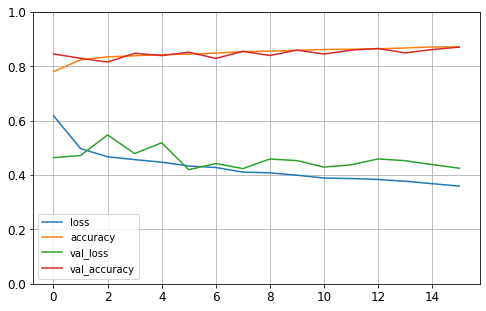

In [ ]:
# Gráfico de treinamento e validação

pd.DataFrame(history2.history).plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(0,1) # ajusta o eixo y para os limites de 0 a 1
plt.show()

In [ ]:
# Criando um modelo com validação cruzada K-fold e treinando com diversas combinações de hiperparâmetros

param_distribs = {
    "n_hidden": [2, 3, 4],
    "n_neurons": np.arange(1,300),
    "learning_rate": reciprocal(3e-4, 3e-2),
}

keras_clas_cv = RandomizedSearchCV(keras_clas, param_distribs, n_iter=10, cv=3)
keras_clas_cv.fit(X_train, y_train, epochs=60,
                  validation_data=(X_valid,y_valid),
                  callbacks=[keras.callbacks.EarlyStopping(patience=10)])

Epoch 1/60


/usr/local/lib/python3.8/dist-packages/keras/optimizers/optimizer_v2/gradient_descent.py:108: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


1146/1146 [==============================] - 5s 4ms/step - loss: 1.2702 - accuracy: 0.6303 - val_loss: 0.8170 - val_accuracy: 0.7486
Epoch 2/60
1146/1146 [==============================] - 4s 4ms/step - loss: 0.7323 - accuracy: 0.7631 - val_loss: 0.6576 - val_accuracy: 0.7826
Epoch 3/60
1146/1146 [==============================] - 4s 4ms/step - loss: 0.6275 - accuracy: 0.7916 - val_loss: 0.5883 - val_accuracy: 0.8044
Epoch 4/60
1146/1146 [==============================] - 4s 4ms/step - loss: 0.5735 - accuracy: 0.8092 - val_loss: 0.5464 - val_accuracy: 0.8158
Epoch 5/60
1146/1146 [==============================] - 4s 4ms/step - loss: 0.5390 - accuracy: 0.8182 - val_loss: 0.5304 - val_accuracy: 0.8210
Epoch 6/60
1146/1146 [==============================] - 4s 4ms/step - loss: 0.5156 - accuracy: 0.8258 - val_loss: 0.4975 - val_accuracy: 0.8288
Epoch 7/60
1146/1146 [==============================] - 5s 4ms/step - loss: 0.4970 - accuracy: 0.8312 - val_loss: 0.4818 - val_accuracy: 0.8398
Epo

/usr/local/lib/python3.8/dist-packages/keras/optimizers/optimizer_v2/gradient_descent.py:108: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


1146/1146 [==============================] - 5s 4ms/step - loss: 1.2393 - accuracy: 0.6194 - val_loss: 0.8033 - val_accuracy: 0.7382
Epoch 2/60
1146/1146 [==============================] - 4s 4ms/step - loss: 0.7288 - accuracy: 0.7602 - val_loss: 0.6494 - val_accuracy: 0.7904
Epoch 3/60
1146/1146 [==============================] - 4s 4ms/step - loss: 0.6239 - accuracy: 0.7942 - val_loss: 0.5844 - val_accuracy: 0.8134
Epoch 4/60
1146/1146 [==============================] - 4s 4ms/step - loss: 0.5695 - accuracy: 0.8114 - val_loss: 0.5436 - val_accuracy: 0.8176
Epoch 5/60
1146/1146 [==============================] - 4s 4ms/step - loss: 0.5353 - accuracy: 0.8161 - val_loss: 0.5138 - val_accuracy: 0.8270
Epoch 6/60
1146/1146 [==============================] - 4s 4ms/step - loss: 0.5115 - accuracy: 0.8250 - val_loss: 0.4905 - val_accuracy: 0.8368
Epoch 7/60
1146/1146 [==============================] - 4s 4ms/step - loss: 0.4929 - accuracy: 0.8304 - val_loss: 0.4756 - val_accuracy: 0.8422
Epo

/usr/local/lib/python3.8/dist-packages/keras/optimizers/optimizer_v2/gradient_descent.py:108: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


1146/1146 [==============================] - 5s 4ms/step - loss: 1.2745 - accuracy: 0.6141 - val_loss: 0.8289 - val_accuracy: 0.7280
Epoch 2/60
1146/1146 [==============================] - 4s 4ms/step - loss: 0.7477 - accuracy: 0.7566 - val_loss: 0.6556 - val_accuracy: 0.7932
Epoch 3/60
1146/1146 [==============================] - 4s 4ms/step - loss: 0.6315 - accuracy: 0.7925 - val_loss: 0.5880 - val_accuracy: 0.8104
Epoch 4/60
1146/1146 [==============================] - 4s 4ms/step - loss: 0.5714 - accuracy: 0.8122 - val_loss: 0.5396 - val_accuracy: 0.8232
Epoch 5/60
1146/1146 [==============================] - 4s 4ms/step - loss: 0.5352 - accuracy: 0.8216 - val_loss: 0.5123 - val_accuracy: 0.8298
Epoch 6/60
1146/1146 [==============================] - 4s 4ms/step - loss: 0.5105 - accuracy: 0.8283 - val_loss: 0.4911 - val_accuracy: 0.8370
Epoch 7/60
1146/1146 [==============================] - 4s 4ms/step - loss: 0.4923 - accuracy: 0.8330 - val_loss: 0.4816 - val_accuracy: 0.8390
Epo

/usr/local/lib/python3.8/dist-packages/keras/optimizers/optimizer_v2/gradient_descent.py:108: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


1146/1146 [==============================] - 6s 5ms/step - loss: 2.0538 - accuracy: 0.4535 - val_loss: 1.7083 - val_accuracy: 0.6094
Epoch 2/60
1146/1146 [==============================] - 6s 5ms/step - loss: 1.3431 - accuracy: 0.6435 - val_loss: 1.0612 - val_accuracy: 0.6798
Epoch 3/60
1146/1146 [==============================] - 6s 5ms/step - loss: 0.9416 - accuracy: 0.7018 - val_loss: 0.8459 - val_accuracy: 0.7234
Epoch 4/60
1146/1146 [==============================] - 6s 5ms/step - loss: 0.7954 - accuracy: 0.7342 - val_loss: 0.7458 - val_accuracy: 0.7516
Epoch 5/60
1146/1146 [==============================] - 6s 5ms/step - loss: 0.7175 - accuracy: 0.7598 - val_loss: 0.6877 - val_accuracy: 0.7726
Epoch 6/60
1146/1146 [==============================] - 6s 6ms/step - loss: 0.6655 - accuracy: 0.7772 - val_loss: 0.6390 - val_accuracy: 0.7952
Epoch 7/60
1146/1146 [==============================] - 6s 6ms/step - loss: 0.6260 - accuracy: 0.7905 - val_loss: 0.6055 - val_accuracy: 0.7988
Epo

/usr/local/lib/python3.8/dist-packages/keras/optimizers/optimizer_v2/gradient_descent.py:108: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


1146/1146 [==============================] - 7s 6ms/step - loss: 2.1055 - accuracy: 0.3292 - val_loss: 1.7826 - val_accuracy: 0.4540
Epoch 2/60
1146/1146 [==============================] - 6s 5ms/step - loss: 1.4275 - accuracy: 0.5686 - val_loss: 1.1286 - val_accuracy: 0.6424
Epoch 3/60
1146/1146 [==============================] - 6s 6ms/step - loss: 1.0119 - accuracy: 0.6547 - val_loss: 0.8971 - val_accuracy: 0.6764
Epoch 4/60
1146/1146 [==============================] - 6s 5ms/step - loss: 0.8545 - accuracy: 0.6922 - val_loss: 0.7958 - val_accuracy: 0.7084
Epoch 5/60
1146/1146 [==============================] - 6s 6ms/step - loss: 0.7697 - accuracy: 0.7248 - val_loss: 0.7258 - val_accuracy: 0.7524
Epoch 6/60
1146/1146 [==============================] - 6s 6ms/step - loss: 0.7124 - accuracy: 0.7518 - val_loss: 0.6771 - val_accuracy: 0.7648
Epoch 7/60
1146/1146 [==============================] - 6s 6ms/step - loss: 0.6681 - accuracy: 0.7716 - val_loss: 0.6358 - val_accuracy: 0.7878
Epo

/usr/local/lib/python3.8/dist-packages/keras/optimizers/optimizer_v2/gradient_descent.py:108: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


1146/1146 [==============================] - 8s 6ms/step - loss: 2.0314 - accuracy: 0.3642 - val_loss: 1.6555 - val_accuracy: 0.5782
Epoch 2/60
1146/1146 [==============================] - 7s 6ms/step - loss: 1.3114 - accuracy: 0.6326 - val_loss: 1.0416 - val_accuracy: 0.6732
Epoch 3/60
1146/1146 [==============================] - 7s 6ms/step - loss: 0.9432 - accuracy: 0.6892 - val_loss: 0.8435 - val_accuracy: 0.7172
Epoch 4/60
1146/1146 [==============================] - 7s 6ms/step - loss: 0.8091 - accuracy: 0.7188 - val_loss: 0.7537 - val_accuracy: 0.7358
Epoch 5/60
1146/1146 [==============================] - 7s 6ms/step - loss: 0.7349 - accuracy: 0.7417 - val_loss: 0.6953 - val_accuracy: 0.7602
Epoch 6/60
1146/1146 [==============================] - 7s 6ms/step - loss: 0.6849 - accuracy: 0.7586 - val_loss: 0.6479 - val_accuracy: 0.7734
Epoch 7/60
1146/1146 [==============================] - 7s 6ms/step - loss: 0.6466 - accuracy: 0.7701 - val_loss: 0.6195 - val_accuracy: 0.7808
Epo

/usr/local/lib/python3.8/dist-packages/keras/optimizers/optimizer_v2/gradient_descent.py:108: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


1146/1146 [==============================] - 4s 3ms/step - loss: 2.0319 - accuracy: 0.4173 - val_loss: 1.7716 - val_accuracy: 0.5930
Epoch 2/60
1146/1146 [==============================] - 3s 3ms/step - loss: 1.5643 - accuracy: 0.6228 - val_loss: 1.3633 - val_accuracy: 0.6600
Epoch 3/60
1146/1146 [==============================] - 3s 3ms/step - loss: 1.2417 - accuracy: 0.6625 - val_loss: 1.1186 - val_accuracy: 0.6768
Epoch 4/60
1146/1146 [==============================] - 3s 3ms/step - loss: 1.0553 - accuracy: 0.6790 - val_loss: 0.9800 - val_accuracy: 0.6916
Epoch 5/60
1146/1146 [==============================] - 3s 3ms/step - loss: 0.9450 - accuracy: 0.6961 - val_loss: 0.8937 - val_accuracy: 0.7076
Epoch 6/60
1146/1146 [==============================] - 3s 3ms/step - loss: 0.8731 - accuracy: 0.7115 - val_loss: 0.8352 - val_accuracy: 0.7242
Epoch 7/60
1146/1146 [==============================] - 3s 3ms/step - loss: 0.8224 - accuracy: 0.7264 - val_loss: 0.7922 - val_accuracy: 0.7382
Epo

/usr/local/lib/python3.8/dist-packages/keras/optimizers/optimizer_v2/gradient_descent.py:108: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


1146/1146 [==============================] - 4s 3ms/step - loss: 2.0403 - accuracy: 0.3424 - val_loss: 1.7741 - val_accuracy: 0.5448
Epoch 2/60
1146/1146 [==============================] - 3s 3ms/step - loss: 1.5870 - accuracy: 0.5823 - val_loss: 1.3956 - val_accuracy: 0.6142
Epoch 3/60
1146/1146 [==============================] - 3s 3ms/step - loss: 1.2800 - accuracy: 0.6277 - val_loss: 1.1555 - val_accuracy: 0.6584
Epoch 4/60
1146/1146 [==============================] - 3s 3ms/step - loss: 1.0957 - accuracy: 0.6585 - val_loss: 1.0171 - val_accuracy: 0.6870
Epoch 5/60
1146/1146 [==============================] - 3s 3ms/step - loss: 0.9854 - accuracy: 0.6821 - val_loss: 0.9298 - val_accuracy: 0.7038
Epoch 6/60
1146/1146 [==============================] - 3s 3ms/step - loss: 0.9130 - accuracy: 0.6999 - val_loss: 0.8692 - val_accuracy: 0.7178
Epoch 7/60
1146/1146 [==============================] - 3s 3ms/step - loss: 0.8607 - accuracy: 0.7154 - val_loss: 0.8250 - val_accuracy: 0.7270
Epo

/usr/local/lib/python3.8/dist-packages/keras/optimizers/optimizer_v2/gradient_descent.py:108: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


1146/1146 [==============================] - 4s 3ms/step - loss: 1.9827 - accuracy: 0.3563 - val_loss: 1.7183 - val_accuracy: 0.4810
Epoch 2/60
1146/1146 [==============================] - 3s 3ms/step - loss: 1.5547 - accuracy: 0.5591 - val_loss: 1.3765 - val_accuracy: 0.6458
Epoch 3/60
1146/1146 [==============================] - 3s 3ms/step - loss: 1.2754 - accuracy: 0.6495 - val_loss: 1.1487 - val_accuracy: 0.6766
Epoch 4/60
1146/1146 [==============================] - 3s 3ms/step - loss: 1.0922 - accuracy: 0.6705 - val_loss: 1.0042 - val_accuracy: 0.6910
Epoch 5/60
1146/1146 [==============================] - 4s 3ms/step - loss: 0.9756 - accuracy: 0.6854 - val_loss: 0.9128 - val_accuracy: 0.7046
Epoch 6/60
1146/1146 [==============================] - 3s 3ms/step - loss: 0.8994 - accuracy: 0.7011 - val_loss: 0.8506 - val_accuracy: 0.7230
Epoch 7/60
1146/1146 [==============================] - 3s 3ms/step - loss: 0.8459 - accuracy: 0.7181 - val_loss: 0.8065 - val_accuracy: 0.7372
Epo

/usr/local/lib/python3.8/dist-packages/keras/optimizers/optimizer_v2/gradient_descent.py:108: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


1146/1146 [==============================] - 5s 4ms/step - loss: 1.7012 - accuracy: 0.5423 - val_loss: 1.2360 - val_accuracy: 0.6634
Epoch 2/60
1146/1146 [==============================] - 5s 4ms/step - loss: 1.0590 - accuracy: 0.6764 - val_loss: 0.9170 - val_accuracy: 0.7160
Epoch 3/60
1146/1146 [==============================] - 5s 4ms/step - loss: 0.8614 - accuracy: 0.7179 - val_loss: 0.7931 - val_accuracy: 0.7414
Epoch 4/60
1146/1146 [==============================] - 5s 4ms/step - loss: 0.7700 - accuracy: 0.7427 - val_loss: 0.7235 - val_accuracy: 0.7612
Epoch 5/60
1146/1146 [==============================] - 5s 4ms/step - loss: 0.7121 - accuracy: 0.7625 - val_loss: 0.6771 - val_accuracy: 0.7776
Epoch 6/60
1146/1146 [==============================] - 5s 5ms/step - loss: 0.6709 - accuracy: 0.7759 - val_loss: 0.6404 - val_accuracy: 0.7850
Epoch 7/60
1146/1146 [==============================] - 5s 4ms/step - loss: 0.6390 - accuracy: 0.7859 - val_loss: 0.6156 - val_accuracy: 0.7986
Epo

/usr/local/lib/python3.8/dist-packages/keras/optimizers/optimizer_v2/gradient_descent.py:108: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


1146/1146 [==============================] - 7s 5ms/step - loss: 1.6461 - accuracy: 0.5578 - val_loss: 1.1859 - val_accuracy: 0.6750
Epoch 2/60
1146/1146 [==============================] - 5s 5ms/step - loss: 1.0214 - accuracy: 0.6894 - val_loss: 0.8842 - val_accuracy: 0.7150
Epoch 3/60
1146/1146 [==============================] - 5s 5ms/step - loss: 0.8366 - accuracy: 0.7295 - val_loss: 0.7726 - val_accuracy: 0.7454
Epoch 4/60
1146/1146 [==============================] - 5s 5ms/step - loss: 0.7512 - accuracy: 0.7542 - val_loss: 0.7072 - val_accuracy: 0.7748
Epoch 5/60
1146/1146 [==============================] - 6s 5ms/step - loss: 0.6971 - accuracy: 0.7715 - val_loss: 0.6624 - val_accuracy: 0.7844
Epoch 6/60
1146/1146 [==============================] - 6s 5ms/step - loss: 0.6578 - accuracy: 0.7831 - val_loss: 0.6296 - val_accuracy: 0.7966
Epoch 7/60
1146/1146 [==============================] - 5s 5ms/step - loss: 0.6278 - accuracy: 0.7929 - val_loss: 0.6030 - val_accuracy: 0.8048
Epo

/usr/local/lib/python3.8/dist-packages/keras/optimizers/optimizer_v2/gradient_descent.py:108: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


1146/1146 [==============================] - 6s 5ms/step - loss: 1.6766 - accuracy: 0.5591 - val_loss: 1.2218 - val_accuracy: 0.6768
Epoch 2/60
1146/1146 [==============================] - 6s 5ms/step - loss: 1.0548 - accuracy: 0.6820 - val_loss: 0.9069 - val_accuracy: 0.7142
Epoch 3/60
1146/1146 [==============================] - 6s 5ms/step - loss: 0.8596 - accuracy: 0.7212 - val_loss: 0.7857 - val_accuracy: 0.7464
Epoch 4/60
1146/1146 [==============================] - 6s 5ms/step - loss: 0.7680 - accuracy: 0.7470 - val_loss: 0.7170 - val_accuracy: 0.7682
Epoch 5/60
1146/1146 [==============================] - 6s 5ms/step - loss: 0.7095 - accuracy: 0.7661 - val_loss: 0.6691 - val_accuracy: 0.7876
Epoch 6/60
1146/1146 [==============================] - 6s 5ms/step - loss: 0.6674 - accuracy: 0.7825 - val_loss: 0.6333 - val_accuracy: 0.7946
Epoch 7/60
1146/1146 [==============================] - 5s 5ms/step - loss: 0.6348 - accuracy: 0.7921 - val_loss: 0.6039 - val_accuracy: 0.8076
Epo

/usr/local/lib/python3.8/dist-packages/keras/optimizers/optimizer_v2/gradient_descent.py:108: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


1146/1146 [==============================] - 7s 6ms/step - loss: 1.9480 - accuracy: 0.4909 - val_loss: 1.5998 - val_accuracy: 0.6482
Epoch 2/60
1146/1146 [==============================] - 7s 6ms/step - loss: 1.3422 - accuracy: 0.6529 - val_loss: 1.1270 - val_accuracy: 0.6656
Epoch 3/60
1146/1146 [==============================] - 7s 6ms/step - loss: 1.0218 - accuracy: 0.6823 - val_loss: 0.9223 - val_accuracy: 0.7022
Epoch 4/60
1146/1146 [==============================] - 7s 6ms/step - loss: 0.8759 - accuracy: 0.7116 - val_loss: 0.8181 - val_accuracy: 0.7340
Epoch 5/60
1146/1146 [==============================] - 7s 6ms/step - loss: 0.7942 - accuracy: 0.7348 - val_loss: 0.7560 - val_accuracy: 0.7584
Epoch 6/60
1146/1146 [==============================] - 7s 6ms/step - loss: 0.7404 - accuracy: 0.7551 - val_loss: 0.7098 - val_accuracy: 0.7692
Epoch 7/60
1146/1146 [==============================] - 7s 6ms/step - loss: 0.6995 - accuracy: 0.7679 - val_loss: 0.6764 - val_accuracy: 0.7722
Epo

/usr/local/lib/python3.8/dist-packages/keras/optimizers/optimizer_v2/gradient_descent.py:108: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


1146/1146 [==============================] - 7s 6ms/step - loss: 1.9776 - accuracy: 0.3858 - val_loss: 1.6598 - val_accuracy: 0.5582
Epoch 2/60
1146/1146 [==============================] - 7s 6ms/step - loss: 1.3993 - accuracy: 0.6331 - val_loss: 1.1627 - val_accuracy: 0.6712
Epoch 3/60
1146/1146 [==============================] - 7s 6ms/step - loss: 1.0501 - accuracy: 0.6795 - val_loss: 0.9366 - val_accuracy: 0.6996
Epoch 4/60
1146/1146 [==============================] - 7s 6ms/step - loss: 0.8905 - accuracy: 0.7102 - val_loss: 0.8235 - val_accuracy: 0.7332
Epoch 5/60
1146/1146 [==============================] - 7s 6ms/step - loss: 0.8043 - accuracy: 0.7344 - val_loss: 0.7565 - val_accuracy: 0.7528
Epoch 6/60
1146/1146 [==============================] - 7s 6ms/step - loss: 0.7475 - accuracy: 0.7499 - val_loss: 0.7106 - val_accuracy: 0.7620
Epoch 7/60
1146/1146 [==============================] - 7s 6ms/step - loss: 0.7056 - accuracy: 0.7642 - val_loss: 0.6719 - val_accuracy: 0.7806
Epo

/usr/local/lib/python3.8/dist-packages/keras/optimizers/optimizer_v2/gradient_descent.py:108: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


1146/1146 [==============================] - 7s 6ms/step - loss: 2.0162 - accuracy: 0.4261 - val_loss: 1.7135 - val_accuracy: 0.5754
Epoch 2/60
1146/1146 [==============================] - 7s 6ms/step - loss: 1.4572 - accuracy: 0.6269 - val_loss: 1.2075 - val_accuracy: 0.6676
Epoch 3/60
1146/1146 [==============================] - 7s 6ms/step - loss: 1.0850 - accuracy: 0.6663 - val_loss: 0.9567 - val_accuracy: 0.6918
Epoch 4/60
1146/1146 [==============================] - 7s 6ms/step - loss: 0.9097 - accuracy: 0.6945 - val_loss: 0.8374 - val_accuracy: 0.7230
Epoch 5/60
1146/1146 [==============================] - 7s 6ms/step - loss: 0.8187 - accuracy: 0.7184 - val_loss: 0.7689 - val_accuracy: 0.7376
Epoch 6/60
1146/1146 [==============================] - 7s 6ms/step - loss: 0.7620 - accuracy: 0.7386 - val_loss: 0.7230 - val_accuracy: 0.7546
Epoch 7/60
1146/1146 [==============================] - 7s 6ms/step - loss: 0.7207 - accuracy: 0.7549 - val_loss: 0.6874 - val_accuracy: 0.7662
Epo

/usr/local/lib/python3.8/dist-packages/keras/optimizers/optimizer_v2/gradient_descent.py:108: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


Epoch 1/60
1146/1146 [==============================] - 4s 3ms/step - loss: 2.2422 - accuracy: 0.1694 - val_loss: 2.1653 - val_accuracy: 0.2780
Epoch 2/60
1146/1146 [==============================] - 3s 3ms/step - loss: 2.0731 - accuracy: 0.3838 - val_loss: 1.9566 - val_accuracy: 0.4668
Epoch 3/60
1146/1146 [==============================] - 3s 3ms/step - loss: 1.8101 - accuracy: 0.5179 - val_loss: 1.6378 - val_accuracy: 0.5736
Epoch 4/60
1146/1146 [==============================] - 3s 3ms/step - loss: 1.4900 - accuracy: 0.5808 - val_loss: 1.3339 - val_accuracy: 0.6108
Epoch 5/60
1146/1146 [==============================] - 3s 3ms/step - loss: 1.2401 - accuracy: 0.6127 - val_loss: 1.1341 - val_accuracy: 0.6296
Epoch 6/60
1146/1146 [==============================] - 3s 3ms/step - loss: 1.0822 - accuracy: 0.6301 - val_loss: 1.0105 - val_accuracy: 0.6412
Epoch 7/60
1146/1146 [==============================] - 3s 3ms/step - loss: 0.9810 - accuracy: 0.6517 - val_loss: 0.9290 - val_accuracy:

/usr/local/lib/python3.8/dist-packages/keras/optimizers/optimizer_v2/gradient_descent.py:108: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


1146/1146 [==============================] - 4s 3ms/step - loss: 2.2066 - accuracy: 0.2219 - val_loss: 2.1029 - val_accuracy: 0.3406
Epoch 2/60
1146/1146 [==============================] - 3s 3ms/step - loss: 1.9879 - accuracy: 0.3846 - val_loss: 1.8517 - val_accuracy: 0.4248
Epoch 3/60
1146/1146 [==============================] - 3s 3ms/step - loss: 1.6962 - accuracy: 0.4869 - val_loss: 1.5169 - val_accuracy: 0.5756
Epoch 4/60
1146/1146 [==============================] - 3s 3ms/step - loss: 1.3753 - accuracy: 0.5940 - val_loss: 1.2228 - val_accuracy: 0.6288
Epoch 5/60
1146/1146 [==============================] - 3s 3ms/step - loss: 1.1360 - accuracy: 0.6308 - val_loss: 1.0358 - val_accuracy: 0.6544
Epoch 6/60
1146/1146 [==============================] - 3s 3ms/step - loss: 0.9902 - accuracy: 0.6528 - val_loss: 0.9270 - val_accuracy: 0.6732
Epoch 7/60
1146/1146 [==============================] - 3s 3ms/step - loss: 0.9023 - accuracy: 0.6739 - val_loss: 0.8601 - val_accuracy: 0.6854
Epo

/usr/local/lib/python3.8/dist-packages/keras/optimizers/optimizer_v2/gradient_descent.py:108: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


Epoch 1/60
1146/1146 [==============================] - 4s 3ms/step - loss: 2.2282 - accuracy: 0.2265 - val_loss: 2.1317 - val_accuracy: 0.3920
Epoch 2/60
1146/1146 [==============================] - 3s 3ms/step - loss: 2.0246 - accuracy: 0.4925 - val_loss: 1.8909 - val_accuracy: 0.5580
Epoch 3/60
1146/1146 [==============================] - 3s 3ms/step - loss: 1.7421 - accuracy: 0.5533 - val_loss: 1.5680 - val_accuracy: 0.5958
Epoch 4/60
1146/1146 [==============================] - 3s 3ms/step - loss: 1.4445 - accuracy: 0.5921 - val_loss: 1.3010 - val_accuracy: 0.6308
Epoch 5/60
1146/1146 [==============================] - 3s 3ms/step - loss: 1.2251 - accuracy: 0.6251 - val_loss: 1.1236 - val_accuracy: 0.6556
Epoch 6/60
1146/1146 [==============================] - 3s 3ms/step - loss: 1.0785 - accuracy: 0.6468 - val_loss: 1.0039 - val_accuracy: 0.6650
Epoch 7/60
1146/1146 [==============================] - 3s 3ms/step - loss: 0.9786 - accuracy: 0.6663 - val_loss: 0.9212 - val_accuracy:

/usr/local/lib/python3.8/dist-packages/keras/optimizers/optimizer_v2/gradient_descent.py:108: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


Epoch 1/60
1146/1146 [==============================] - 5s 4ms/step - loss: 2.0787 - accuracy: 0.3640 - val_loss: 1.8534 - val_accuracy: 0.5140
Epoch 2/60
1146/1146 [==============================] - 4s 3ms/step - loss: 1.6561 - accuracy: 0.5661 - val_loss: 1.4541 - val_accuracy: 0.6022
Epoch 3/60
1146/1146 [==============================] - 4s 3ms/step - loss: 1.3116 - accuracy: 0.6211 - val_loss: 1.1685 - val_accuracy: 0.6452
Epoch 4/60
1146/1146 [==============================] - 4s 3ms/step - loss: 1.0897 - accuracy: 0.6535 - val_loss: 0.9991 - val_accuracy: 0.6776
Epoch 5/60
1146/1146 [==============================] - 4s 3ms/step - loss: 0.9578 - accuracy: 0.6785 - val_loss: 0.8987 - val_accuracy: 0.7030
Epoch 6/60
1146/1146 [==============================] - 4s 3ms/step - loss: 0.8773 - accuracy: 0.7005 - val_loss: 0.8361 - val_accuracy: 0.7228
Epoch 7/60
1146/1146 [==============================] - 4s 3ms/step - loss: 0.8231 - accuracy: 0.7189 - val_loss: 0.7907 - val_accuracy:

/usr/local/lib/python3.8/dist-packages/keras/optimizers/optimizer_v2/gradient_descent.py:108: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


1146/1146 [==============================] - 5s 4ms/step - loss: 2.1436 - accuracy: 0.2762 - val_loss: 1.9644 - val_accuracy: 0.4626
Epoch 2/60
1146/1146 [==============================] - 4s 3ms/step - loss: 1.7897 - accuracy: 0.5354 - val_loss: 1.5925 - val_accuracy: 0.6110
Epoch 3/60
1146/1146 [==============================] - 4s 4ms/step - loss: 1.4428 - accuracy: 0.6193 - val_loss: 1.2800 - val_accuracy: 0.6502
Epoch 4/60
1146/1146 [==============================] - 4s 4ms/step - loss: 1.1903 - accuracy: 0.6451 - val_loss: 1.0800 - val_accuracy: 0.6610
Epoch 5/60
1146/1146 [==============================] - 4s 4ms/step - loss: 1.0326 - accuracy: 0.6641 - val_loss: 0.9575 - val_accuracy: 0.6826
Epoch 6/60
1146/1146 [==============================] - 4s 4ms/step - loss: 0.9337 - accuracy: 0.6826 - val_loss: 0.8787 - val_accuracy: 0.6996
Epoch 7/60
1146/1146 [==============================] - 4s 4ms/step - loss: 0.8666 - accuracy: 0.6997 - val_loss: 0.8235 - val_accuracy: 0.7184
Epo

/usr/local/lib/python3.8/dist-packages/keras/optimizers/optimizer_v2/gradient_descent.py:108: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


1146/1146 [==============================] - 5s 4ms/step - loss: 2.1971 - accuracy: 0.2528 - val_loss: 2.0591 - val_accuracy: 0.3528
Epoch 2/60
1146/1146 [==============================] - 4s 4ms/step - loss: 1.9053 - accuracy: 0.4561 - val_loss: 1.7192 - val_accuracy: 0.5458
Epoch 3/60
1146/1146 [==============================] - 4s 3ms/step - loss: 1.5381 - accuracy: 0.5858 - val_loss: 1.3447 - val_accuracy: 0.6472
Epoch 4/60
1146/1146 [==============================] - 4s 4ms/step - loss: 1.2277 - accuracy: 0.6496 - val_loss: 1.0976 - val_accuracy: 0.6740
Epoch 5/60
1146/1146 [==============================] - 4s 4ms/step - loss: 1.0380 - accuracy: 0.6663 - val_loss: 0.9556 - val_accuracy: 0.6892
Epoch 6/60
1146/1146 [==============================] - 4s 4ms/step - loss: 0.9275 - accuracy: 0.6858 - val_loss: 0.8699 - val_accuracy: 0.7082
Epoch 7/60
1146/1146 [==============================] - 4s 4ms/step - loss: 0.8573 - accuracy: 0.7060 - val_loss: 0.8142 - val_accuracy: 0.7246
Epo

/usr/local/lib/python3.8/dist-packages/keras/optimizers/optimizer_v2/gradient_descent.py:108: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


1146/1146 [==============================] - 4s 3ms/step - loss: 1.0405 - accuracy: 0.6559 - val_loss: 0.6171 - val_accuracy: 0.7870
Epoch 2/60
1146/1146 [==============================] - 3s 3ms/step - loss: 0.5687 - accuracy: 0.8007 - val_loss: 0.5827 - val_accuracy: 0.7906
Epoch 3/60
1146/1146 [==============================] - 3s 3ms/step - loss: 0.5015 - accuracy: 0.8232 - val_loss: 0.4712 - val_accuracy: 0.8390
Epoch 4/60
1146/1146 [==============================] - 3s 3ms/step - loss: 0.4637 - accuracy: 0.8365 - val_loss: 0.4716 - val_accuracy: 0.8334
Epoch 5/60
1146/1146 [==============================] - 3s 3ms/step - loss: 0.4382 - accuracy: 0.8433 - val_loss: 0.4222 - val_accuracy: 0.8510
Epoch 6/60
1146/1146 [==============================] - 3s 3ms/step - loss: 0.4179 - accuracy: 0.8492 - val_loss: 0.4217 - val_accuracy: 0.8466
Epoch 7/60
1146/1146 [==============================] - 3s 3ms/step - loss: 0.4042 - accuracy: 0.8556 - val_loss: 0.4417 - val_accuracy: 0.8400
Epo

/usr/local/lib/python3.8/dist-packages/keras/optimizers/optimizer_v2/gradient_descent.py:108: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


1146/1146 [==============================] - 4s 3ms/step - loss: 1.0305 - accuracy: 0.6452 - val_loss: 0.6393 - val_accuracy: 0.7822
Epoch 2/60
1146/1146 [==============================] - 3s 3ms/step - loss: 0.6048 - accuracy: 0.7827 - val_loss: 0.5686 - val_accuracy: 0.7954
Epoch 3/60
1146/1146 [==============================] - 3s 3ms/step - loss: 0.5203 - accuracy: 0.8126 - val_loss: 0.4829 - val_accuracy: 0.8302
Epoch 4/60
1146/1146 [==============================] - 3s 3ms/step - loss: 0.4776 - accuracy: 0.8286 - val_loss: 0.4733 - val_accuracy: 0.8326
Epoch 5/60
1146/1146 [==============================] - 3s 3ms/step - loss: 0.4492 - accuracy: 0.8373 - val_loss: 0.4708 - val_accuracy: 0.8318
Epoch 6/60
1146/1146 [==============================] - 3s 3ms/step - loss: 0.4251 - accuracy: 0.8470 - val_loss: 0.4154 - val_accuracy: 0.8506
Epoch 7/60
1146/1146 [==============================] - 3s 3ms/step - loss: 0.4073 - accuracy: 0.8549 - val_loss: 0.4052 - val_accuracy: 0.8584
Epo

/usr/local/lib/python3.8/dist-packages/keras/optimizers/optimizer_v2/gradient_descent.py:108: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


1146/1146 [==============================] - 4s 3ms/step - loss: 1.0357 - accuracy: 0.6387 - val_loss: 0.6250 - val_accuracy: 0.7790
Epoch 2/60
1146/1146 [==============================] - 3s 3ms/step - loss: 0.5919 - accuracy: 0.7898 - val_loss: 0.5302 - val_accuracy: 0.8164
Epoch 3/60
1146/1146 [==============================] - 3s 3ms/step - loss: 0.5138 - accuracy: 0.8164 - val_loss: 0.5140 - val_accuracy: 0.8158
Epoch 4/60
1146/1146 [==============================] - 3s 3ms/step - loss: 0.4730 - accuracy: 0.8343 - val_loss: 0.4475 - val_accuracy: 0.8456
Epoch 5/60
1146/1146 [==============================] - 3s 3ms/step - loss: 0.4479 - accuracy: 0.8412 - val_loss: 0.4148 - val_accuracy: 0.8526
Epoch 6/60
1146/1146 [==============================] - 3s 3ms/step - loss: 0.4278 - accuracy: 0.8495 - val_loss: 0.4264 - val_accuracy: 0.8512
Epoch 7/60
1146/1146 [==============================] - 3s 3ms/step - loss: 0.4091 - accuracy: 0.8526 - val_loss: 0.4222 - val_accuracy: 0.8464
Epo

/usr/local/lib/python3.8/dist-packages/keras/optimizers/optimizer_v2/gradient_descent.py:108: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


1146/1146 [==============================] - 7s 6ms/step - loss: 1.1102 - accuracy: 0.6717 - val_loss: 0.7115 - val_accuracy: 0.7768
Epoch 2/60
1146/1146 [==============================] - 7s 6ms/step - loss: 0.6388 - accuracy: 0.7876 - val_loss: 0.5693 - val_accuracy: 0.8118
Epoch 3/60
1146/1146 [==============================] - 6s 5ms/step - loss: 0.5476 - accuracy: 0.8142 - val_loss: 0.5206 - val_accuracy: 0.8282
Epoch 4/60
1146/1146 [==============================] - 7s 6ms/step - loss: 0.5033 - accuracy: 0.8252 - val_loss: 0.4798 - val_accuracy: 0.8392
Epoch 5/60
1146/1146 [==============================] - 6s 5ms/step - loss: 0.4771 - accuracy: 0.8331 - val_loss: 0.4549 - val_accuracy: 0.8462
Epoch 6/60
1146/1146 [==============================] - 6s 6ms/step - loss: 0.4574 - accuracy: 0.8409 - val_loss: 0.4383 - val_accuracy: 0.8550
Epoch 7/60
1146/1146 [==============================] - 6s 5ms/step - loss: 0.4424 - accuracy: 0.8449 - val_loss: 0.4280 - val_accuracy: 0.8582
Epo

/usr/local/lib/python3.8/dist-packages/keras/optimizers/optimizer_v2/gradient_descent.py:108: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


1146/1146 [==============================] - 7s 6ms/step - loss: 1.1484 - accuracy: 0.6414 - val_loss: 0.7309 - val_accuracy: 0.7586
Epoch 2/60
1146/1146 [==============================] - 6s 5ms/step - loss: 0.6555 - accuracy: 0.7780 - val_loss: 0.5795 - val_accuracy: 0.8062
Epoch 3/60
1146/1146 [==============================] - 7s 6ms/step - loss: 0.5600 - accuracy: 0.8087 - val_loss: 0.5169 - val_accuracy: 0.8264
Epoch 4/60
1146/1146 [==============================] - 6s 6ms/step - loss: 0.5123 - accuracy: 0.8216 - val_loss: 0.4925 - val_accuracy: 0.8340
Epoch 5/60
1146/1146 [==============================] - 6s 6ms/step - loss: 0.4824 - accuracy: 0.8291 - val_loss: 0.4800 - val_accuracy: 0.8370
Epoch 6/60
1146/1146 [==============================] - 6s 5ms/step - loss: 0.4620 - accuracy: 0.8363 - val_loss: 0.4538 - val_accuracy: 0.8450
Epoch 7/60
1146/1146 [==============================] - 7s 6ms/step - loss: 0.4472 - accuracy: 0.8415 - val_loss: 0.4328 - val_accuracy: 0.8534
Epo

/usr/local/lib/python3.8/dist-packages/keras/optimizers/optimizer_v2/gradient_descent.py:108: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


1146/1146 [==============================] - 7s 6ms/step - loss: 1.1462 - accuracy: 0.6537 - val_loss: 0.7216 - val_accuracy: 0.7576
Epoch 2/60
1146/1146 [==============================] - 6s 6ms/step - loss: 0.6469 - accuracy: 0.7852 - val_loss: 0.5921 - val_accuracy: 0.7936
Epoch 3/60
1146/1146 [==============================] - 7s 6ms/step - loss: 0.5536 - accuracy: 0.8114 - val_loss: 0.5219 - val_accuracy: 0.8218
Epoch 4/60
1146/1146 [==============================] - 6s 6ms/step - loss: 0.5088 - accuracy: 0.8226 - val_loss: 0.4772 - val_accuracy: 0.8332
Epoch 5/60
1146/1146 [==============================] - 6s 6ms/step - loss: 0.4819 - accuracy: 0.8316 - val_loss: 0.4565 - val_accuracy: 0.8420
Epoch 6/60
1146/1146 [==============================] - 7s 6ms/step - loss: 0.4611 - accuracy: 0.8376 - val_loss: 0.4503 - val_accuracy: 0.8428
Epoch 7/60
1146/1146 [==============================] - 6s 6ms/step - loss: 0.4459 - accuracy: 0.8429 - val_loss: 0.4273 - val_accuracy: 0.8542
Epo

/usr/local/lib/python3.8/dist-packages/keras/optimizers/optimizer_v2/gradient_descent.py:108: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


Epoch 1/60
1146/1146 [==============================] - 6s 5ms/step - loss: 0.6945 - accuracy: 0.7619 - val_loss: 0.4717 - val_accuracy: 0.8326
Epoch 2/60
1146/1146 [==============================] - 6s 5ms/step - loss: 0.4647 - accuracy: 0.8337 - val_loss: 0.5041 - val_accuracy: 0.8098
Epoch 3/60
1146/1146 [==============================] - 6s 5ms/step - loss: 0.4112 - accuracy: 0.8523 - val_loss: 0.3791 - val_accuracy: 0.8638
Epoch 4/60
1146/1146 [==============================] - 6s 5ms/step - loss: 0.3806 - accuracy: 0.8627 - val_loss: 0.3558 - val_accuracy: 0.8726
Epoch 5/60
1146/1146 [==============================] - 6s 5ms/step - loss: 0.3603 - accuracy: 0.8700 - val_loss: 0.3450 - val_accuracy: 0.8756
Epoch 6/60
1146/1146 [==============================] - 6s 5ms/step - loss: 0.3407 - accuracy: 0.8763 - val_loss: 0.3553 - val_accuracy: 0.8714
Epoch 7/60
1146/1146 [==============================] - 6s 5ms/step - loss: 0.3242 - accuracy: 0.8812 - val_loss: 0.3780 - val_accuracy:

/usr/local/lib/python3.8/dist-packages/keras/optimizers/optimizer_v2/gradient_descent.py:108: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


Epoch 1/60
1146/1146 [==============================] - 7s 6ms/step - loss: 0.7011 - accuracy: 0.7568 - val_loss: 0.4838 - val_accuracy: 0.8358
Epoch 2/60
1146/1146 [==============================] - 6s 5ms/step - loss: 0.4662 - accuracy: 0.8323 - val_loss: 0.4384 - val_accuracy: 0.8448
Epoch 3/60
1146/1146 [==============================] - 6s 5ms/step - loss: 0.4147 - accuracy: 0.8474 - val_loss: 0.4121 - val_accuracy: 0.8522
Epoch 4/60
1146/1146 [==============================] - 6s 5ms/step - loss: 0.3788 - accuracy: 0.8619 - val_loss: 0.3680 - val_accuracy: 0.8650
Epoch 5/60
1146/1146 [==============================] - 6s 5ms/step - loss: 0.3567 - accuracy: 0.8689 - val_loss: 0.3472 - val_accuracy: 0.8736
Epoch 6/60
1146/1146 [==============================] - 6s 5ms/step - loss: 0.3404 - accuracy: 0.8757 - val_loss: 0.3693 - val_accuracy: 0.8690
Epoch 7/60
1146/1146 [==============================] - 6s 5ms/step - loss: 0.3232 - accuracy: 0.8791 - val_loss: 0.3361 - val_accuracy:

/usr/local/lib/python3.8/dist-packages/keras/optimizers/optimizer_v2/gradient_descent.py:108: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


Epoch 1/60
1146/1146 [==============================] - 6s 5ms/step - loss: 0.7021 - accuracy: 0.7575 - val_loss: 0.4762 - val_accuracy: 0.8370
Epoch 2/60
1146/1146 [==============================] - 6s 5ms/step - loss: 0.4673 - accuracy: 0.8351 - val_loss: 0.4105 - val_accuracy: 0.8564
Epoch 3/60
1146/1146 [==============================] - 6s 5ms/step - loss: 0.4130 - accuracy: 0.8520 - val_loss: 0.4005 - val_accuracy: 0.8604
Epoch 4/60
1146/1146 [==============================] - 6s 5ms/step - loss: 0.3831 - accuracy: 0.8605 - val_loss: 0.3645 - val_accuracy: 0.8726
Epoch 5/60
1146/1146 [==============================] - 6s 5ms/step - loss: 0.3584 - accuracy: 0.8697 - val_loss: 0.3681 - val_accuracy: 0.8680
Epoch 6/60
1146/1146 [==============================] - 6s 5ms/step - loss: 0.3418 - accuracy: 0.8735 - val_loss: 0.3876 - val_accuracy: 0.8608
Epoch 7/60
1146/1146 [==============================] - 6s 5ms/step - loss: 0.3234 - accuracy: 0.8810 - val_loss: 0.3536 - val_accuracy:

RandomizedSearchCV(cv=3,
                   estimator=<keras.wrappers.scikit_learn.KerasClassifier object at 0x7f0402a80220>,
                   param_distributions={'learning_rate': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7f03fc442f70>,
                                        'n_hidden': [2, 3, 4],
                                        'n_neurons': array([  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,
        14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,
        27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,...
       209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219, 220, 221,
       222, 223, 224, 225, 226, 227, 228, 229, 230, 231, 232, 233, 234,
       235, 236, 237, 238, 239, 240, 241, 242, 243, 244, 245, 246, 247,
       248, 249, 250, 251, 252, 253, 254, 255, 256, 257, 258, 259, 260,
       261, 262, 263, 264, 265, 266, 267, 268, 269, 270, 271, 272, 273,
       274, 275, 276, 277, 278, 279, 280, 281, 282, 283

In [ ]:
# Obtido os hiperparâmetros do modelo que apresentou melhor acurácia

keras_clas_cv.best_params_

{'learning_rate': 0.023360169771256097, 'n_hidden': 3, 'n_neurons': 219}

In [ ]:
# Transferindo o modelo melhor ajustado

model_cv=keras_clas_cv.best_estimator_.model

In [ ]:
# Salvando modelo para uso posterior se necessário
model_cv.save("model_cv.h5")

In [ ]:
# Compilando modelo com otimizador SGD, taxa de aprendizagem de 0.023 e momentum de 0.85

optimizer = keras.optimizers.SGD(learning_rate=0.023, momentum=0.85)

model_cv.compile(loss='sparse_categorical_crossentropy', 
              optimizer=optimizer, 
              metrics=['accuracy'])

In [ ]:
# REalizando uma nova sequÊncia de aprendizado do modelo
history_cv = model_cv.fit(X_train,y_train, epochs=30,
                    validation_data=[X_valid,y_valid],
                    callbacks=[keras.callbacks.EarlyStopping(patience=10, restore_best_weights=True)]
                    )

Epoch 1/30
1719/1719 [==============================] - 8s 5ms/step - loss: 0.1914 - accuracy: 0.9267 - val_loss: 0.3209 - val_accuracy: 0.8948
Epoch 2/30
1719/1719 [==============================] - 8s 5ms/step - loss: 0.1885 - accuracy: 0.9283 - val_loss: 0.3352 - val_accuracy: 0.9002
Epoch 3/30
1719/1719 [==============================] - 8s 5ms/step - loss: 0.1797 - accuracy: 0.9309 - val_loss: 0.3123 - val_accuracy: 0.8984
Epoch 4/30
1719/1719 [==============================] - 8s 5ms/step - loss: 0.1785 - accuracy: 0.9306 - val_loss: 0.3365 - val_accuracy: 0.8934
Epoch 5/30
1719/1719 [==============================] - 8s 5ms/step - loss: 0.1677 - accuracy: 0.9355 - val_loss: 0.3480 - val_accuracy: 0.8922
Epoch 6/30
1719/1719 [==============================] - 8s 5ms/step - loss: 0.1630 - accuracy: 0.9379 - val_loss: 0.3318 - val_accuracy: 0.8918
Epoch 7/30
1719/1719 [==============================] - 8s 5ms/step - loss: 0.1545 - accuracy: 0.9403 - val_loss: 0.3371 - val_accuracy:

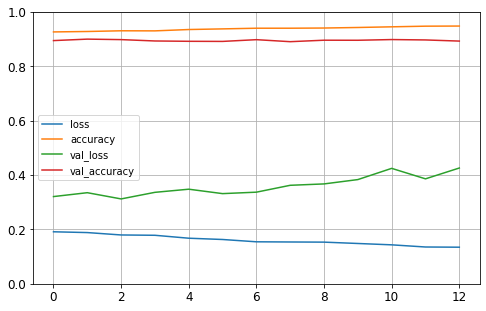

In [ ]:
# Gráfico de treinamento e validação

pd.DataFrame(history_cv.history).plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(0,1) # ajusta o eixo y para os limites de 0 a 1
plt.show()

Como pudemos observar, o modelo que apresentou o melhor resultado foi o modelo treinado com validação cruzadae  que apresenta a estrutura conforme plotado abaixo. Esse modelo obteve uma precisão de 89,30% para os dados de validação.

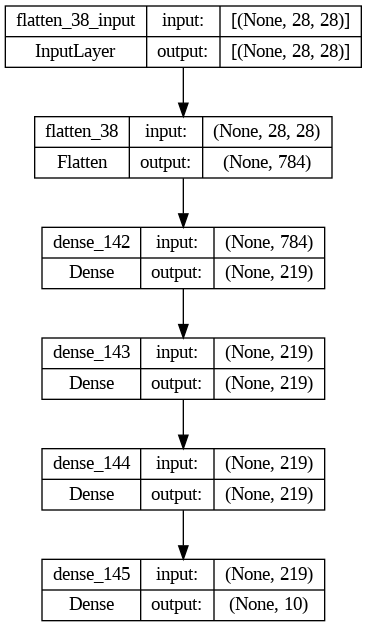

In [ ]:
# Desenho do modelo de PCM que apresentou melhor resultado
from keras.utils.vis_utils import plot_model
plot_model(model_cv, to_file='model_plot.png', show_shapes=True, show_layer_names=True)